<a href="https://colab.research.google.com/github/Charith3800/Neural-Networks/blob/main/Home-Assignment1-3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9142 - loss: 0.2878 - val_accuracy: 0.9862 - val_loss: 0.0438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9891 - val_loss: 0.0318
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9900 - val_loss: 0.0317
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9912 - val_loss: 0.0268
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9913 - val_loss: 0.0268
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9908 - val_loss: 0.0311
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9968 - loss: 0.0086 - val_accuracy: 0.9918 - val_loss: 0.0298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9974 -

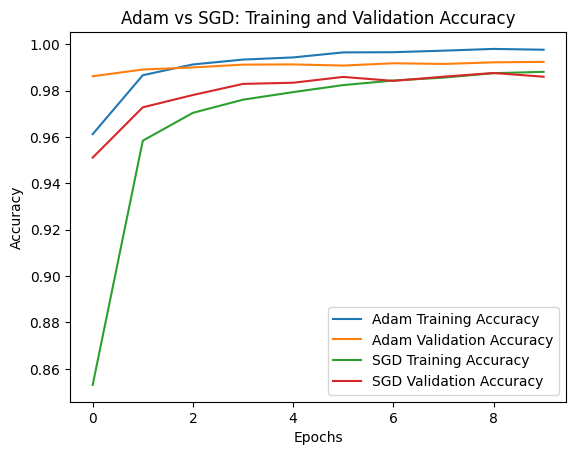

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to include channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
# Train with Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Train with SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
# Plot training and validation accuracy for Adam
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy')

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Adam vs SGD: Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to include channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
# Create a log directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.8998 - loss: 0.3166 - val_accuracy: 0.9868 - val_loss: 0.0399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9863 - val_loss: 0.0469
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9882 - val_loss: 0.0353
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9899 - val_loss: 0.0324
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9955 - loss: 0.0155 - val_accuracy: 0.9910 - val_loss: 0.0261


In [ ]:
!tensorboard --logdir=logs/fit

2025-02-14 01:46:55.793644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739497615.817595   14845 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739497615.824722   14845 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 01:47:01.068672: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, u

1. **What patterns do you observe in the training and validation accuracy curves?**

> The training accuracy increases steadily, while the validation accuracy improves initially but may plateau or decrease, indicating overfitting.


  


2. **How can you use TensorBoard to detect overfitting?**

> In TensorBoard, I check if the training loss decreases while validation loss increases, or if the gap between training and validation accuracy widens, signaling overfitting.


3. **What happens when you increase the number of epochs?**

> More epochs improve training accuracy but can cause validation accuracy to plateau or drop, leading to overfitting and longer training times.
